## Agenda

- Tokenization
- Stemming
- Lemmatization
    - Pattern
    - TextBlob
- POS Tagging
    - Pattern
    - TextBlob
- Stop Word removal

## Tokenizer
- Wie splittet man einfach einen Satz in Wörter auf?
- https://www.admin.ch/opc/de/classified-compilation/19995395/index.html#a8

In [1]:
import nltk
from nltk.tokenize import word_tokenize

In [2]:
verfassung = '''
Im Namen Gottes des Allmächtigen!

Das Schweizervolk und die Kantone,

in der Verantwortung gegenüber der Schöpfung,

im Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,

im Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,

im Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,

gewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,

geben sich folgende Verfassung:
'''

In [3]:
#verfassung = verfassung.decode('utf-8')
verfassung

'\nIm Namen Gottes des Allmächtigen!\n\nDas Schweizervolk und die Kantone,\n\nin der Verantwortung gegenüber der Schöpfung,\n\nim Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,\n\nim Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,\n\nim Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,\n\ngewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,\n\ngeben sich folgende Verfassung:\n'

### In einzelne Wörter + Zeichen

In [4]:
tokens = nltk.word_tokenize(verfassung)
tokens[0:10]

['Im',
 'Namen',
 'Gottes',
 'des',
 'Allmächtigen',
 '!',
 'Das',
 'Schweizervolk',
 'und',
 'die']

### In Wörter
ohne Ausrufezeichen und so

In [7]:
"Wurst ist so wie Brot".lower() #alles klein schreiben, damit es stimmt

'wurst ist so wie brot'

In [5]:
words = word_tokenize(verfassung)
words=[word.lower() for word in words if word.isalpha()] #isalpha heisst: sind es Buchstaben?
#word.lower() dass alles klein ist, sonst zählt er sie separat.
words[0:20]

['im',
 'namen',
 'gottes',
 'des',
 'allmächtigen',
 'das',
 'schweizervolk',
 'und',
 'die',
 'kantone',
 'in',
 'der',
 'verantwortung',
 'gegenüber',
 'der',
 'schöpfung',
 'im',
 'bestreben',
 'den',
 'bund']

### Hier noch ein paar praktische Python funktionen wie isalpha

|  s.startswith(t) | test if s starts with t |
|  ------ | ------ |
|  s.endswith(t) | test if s ends with t |
|  t in s | test if t is a substring of s |
|  s.islower() | test if s contains cased characters and all are lowercase |
|  s.isupper() | test if s contains cased characters and all are uppercase |
|  s.isalpha() | test if s is non-empty and all characters in s are alphabetic |
|  s.isalnum() | test if s is non-empty and all characters in s are alphanumeric |
|  s.isdigit() | test if s is non-empty and all characters in s are digits |
|  s.istitle() | test if s contains cased characters and is titlecased (i.e. all words in s have initial capitals) |

### In Sätze
nach Sätzen zerlegen
- zum Satzlänge testen 
- oder ähnliches

In [8]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(verfassung)
sentences

['\nIm Namen Gottes des Allmächtigen!',
 'Das Schweizervolk und die Kantone,\n\nin der Verantwortung gegenüber der Schöpfung,\n\nim Bestreben, den Bund zu erneuern, um Freiheit und Demokratie, Unabhängigkeit und Frieden in Solidarität und Offenheit gegenüber der Welt zu stärken,\n\nim Willen, in gegenseitiger Rücksichtnahme und Achtung ihre Vielfalt in der Einheit zu leben,\n\nim Bewusstsein der gemeinsamen Errungenschaften und der Verantwortung gegenüber den künftigen Generationen,\n\ngewiss, dass frei nur ist, wer seine Freiheit gebraucht, und dass die Stärke des Volkes sich misst am Wohl der Schwachen,\n\ngeben sich folgende Verfassung:']

## Stemming 
### auf das Urspungswort bringen
- d.h. das überführen von Wörtern in den gleichen Stamm. 
- Übliche Probleme die Sprache so mit sich bringt:
    - Deklination: gehe, gehst, gehen, geht, ... es handelt sich um das gleiche Wort. 
    - Plural, Groß/Kleinschreibung: katze, katzen, Katze ... es handelt sich auch um das gleiche Wort. 
    - ...

In [9]:
porter = nltk.PorterStemmer()
lancaster = nltk.LancasterStemmer()

### Porter stemmer
- geht ganz ok für Englisch
- https://de.wikipedia.org/wiki/Porter-Stemmer-Algorithmus

In [10]:
from nltk.corpus import udhr
engl_words = udhr.words("English-Latin1")
engl_words[0:20]

['Universal',
 'Declaration',
 'of',
 'Human',
 'Rights',
 'Preamble',
 'Whereas',
 'recognition',
 'of',
 'the',
 'inherent',
 'dignity',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalienable',
 'rights',
 'of']

In [11]:
[porter.stem(w) for w in engl_words][0:20]

['univers',
 'declar',
 'of',
 'human',
 'right',
 'preambl',
 'wherea',
 'recognit',
 'of',
 'the',
 'inher',
 'digniti',
 'and',
 'of',
 'the',
 'equal',
 'and',
 'inalien',
 'right',
 'of']

In [15]:
[porter.stem("Universe")]

['univers']

In [14]:
[porter.stem("universal")]

['univers']

In [13]:
[porter.stem("University")]

['univers']

### Lancaster Stemmer
- kommt zu leicht anderen "stämmen"
- funktioniert nicht so gut für deutsch

In [34]:
[lancaster.stem(w) for w in engl_words][0:20]

[u'univers',
 u'decl',
 u'of',
 u'hum',
 u'right',
 u'preambl',
 u'wherea',
 u'recognit',
 u'of',
 u'the',
 u'inh',
 u'dign',
 u'and',
 u'of',
 u'the',
 u'eq',
 u'and',
 u'ina',
 u'right',
 u'of']

### Snowball stemmer
- Geht gut für deusch
- http://snowball.tartarus.org/algorithms/german/stemmer.html

In [18]:
snowball = nltk.stem.snowball.GermanStemmer()

In [21]:
[snowball.stem(w) for w in words][0:20]

['im',
 'nam',
 'gott',
 'des',
 'allmacht',
 'das',
 'schweizervolk',
 'und',
 'die',
 'kanton',
 'in',
 'der',
 'verantwort',
 'gegenub',
 'der',
 'schopfung',
 'im',
 'bestreb',
 'den',
 'bund']

## Lemmatizer
- Zurückführen des Textes zu "Wörterbuchdefinitionen"

In [22]:
text = "Women in technologies areas are amazing at coding. Especially one woman is great, her name is Ursula Burns."
words = word_tokenize(text)
words_engl =[word.lower() for word in words if word.isalpha()]

In [23]:
nltk.download('wordnet')
from nltk import WordNetLemmatizer

lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_engl]
lemmas[0:20]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Zoe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


['woman',
 'in',
 'technology',
 'area',
 'are',
 'amazing',
 'at',
 'coding',
 'especially',
 'one',
 'woman',
 'is',
 'great',
 'her',
 'name',
 'is',
 'ursula',
 'burn']

### Lematizer Deutsch NLTK
- Geht leider nicht für deusch :( in nltk

In [24]:
party_text = '''
Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''
#party_text = party_text.decode("UTF-8")
words = word_tokenize(party_text)
words_german =[word.lower() for word in words if word.isalpha()]

In [25]:
lemma = nltk.WordNetLemmatizer() 
lemmas = [lemma.lemmatize(i) for i in words_german]
lemmas[0:20] #Der Text bleibt gleich. Schaffts nicht in Deutsch.

['kurz',
 'vor',
 'uhr',
 'sind',
 'polizisten',
 'der',
 'stadtpolizei',
 'in',
 'alle',
 'richtungen',
 'aber',
 'vor',
 'allem',
 'in',
 'richtung',
 'kreis',
 'ausgerückt',
 'grund',
 'war',
 'eine']

## Lemmatizer in Pattern
- Ähnlich wie NLTK funktioniert aber auch für deutsch
- https://www.clips.uantwerpen.be/pattern
- ```pip install pattern```
- Deutsche modelle kommen übrigens von der Uni Zürich https://www.zora.uzh.ch/id/eprint/28579/

In [27]:
!pip install pattern

  Created wheel for pattern: filename=Pattern-3.6-cp37-none-any.whl size=22332727 sha256=4c38689b8dd7bf35b05d381e0f9c1f68da5c90fe00f0e53d1af7adb623516efa
  Stored in directory: C:\Users\Zoe\AppData\Local\pip\Cache\wheels\dc\9a\0e\5fb1a603ed4e3aa8722a88e9cf4a82da7d1b63e3d2cc34bee5
  Created wheel for feedparser: filename=feedparser-5.2.1-cp37-none-any.whl size=44944 sha256=93aaf2020a540aeee6d2a1584240a8ddd4444fc3f160d7b48d99d1042e42be16
  Stored in directory: C:\Users\Zoe\AppData\Local\pip\Cache\wheels\8c\69\b7\f52763c41c5471df57703a0ef718a32a5e81ee35dcf6d4f97f
  Created wheel for python-docx: filename=python_docx-0.8.10-cp37-none-any.whl size=184496 sha256=74c124a3d6a59c3edea303f6739968584ac1a223c3d449897d76206a5b61b48c
  Stored in directory: C:\Users\Zoe\AppData\Local\pip\Cache\wheels\18\0b\a0\1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built pattern feedparser python-docx


In [28]:
from pattern.de import parse

In [29]:
text = "Richtungen Richtung."
s = parse(text, relations=True, lemmata=True)
s

RuntimeError: generator raised StopIteration

In [53]:
lemmata = []
from pattern.de import parsetree
s = parsetree(party_text,relations=True, lemmata=True) 
for sentence in s: 
    for chunk in sentence.chunks:
        for word in chunk.words:
            #print("%s (%s)" %(word,word.lemma))
            lemmata.append(word.lemma)
lemmata[0:20]

['kurz',
 'vor',
 '22.00',
 'uhr',
 'sein',
 'polizist',
 'der',
 'stadtpolizei',
 'in',
 'all',
 'richtungen',
 'aber',
 'vor',
 'in',
 'richtung',
 'kreis',
 '9',
 'ausger\xfcckt',
 'grund',
 'sein']

## Lemmatizer in Textblob
 - https://textblob.readthedocs.io/en/dev/quickstart.html
 - ```pip install -U textblob```
 - ```pip install -U textblob-de```
 - https://github.com/markuskiller/textblob-de

In [30]:
!pip install -U textblob
!pip install -U textblob-de

In [31]:
party_text = '''
Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
'''

from textblob_de import TextBlobDE
from textblob_de import PatternParser
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
blob.parse()
list(blob.words.lemmatize())[0:20]

RuntimeError: generator raised StopIteration

In [34]:
from textblob_de.lemmatizers import PatternParserLemmatizer

In [35]:
_lemmatizer = PatternParserLemmatizer()
_lemmatizer.lemmatize("Das ist ein hässliches Auto.")

RuntimeError: generator raised StopIteration

## POS Tagging (Part of Speech Tagging)
- Ich bin nur interessiert an Substantiven oder Adjektiven oder Verben. 
- Wie kann ich nur diese filtern? 
- Funktioniert für Deutsch nicht auf Anhieb in NLTK :(
- aber gut in pattern und textblob

## Übersicht
https://www.clips.uantwerpen.be/pages/mbsp-tags

|  Tag | Description | Example |
|  ------ | ------ | ------ |
|  **CC** | conjunction, coordinating | and, or, but |
|  **CD** | cardinal number | five, three, 13% |
|  **DT** | determiner | the, a, these |
|  **EX** | existential there | there were six boys |
|  **FW** | foreign word | mais |
|  **IN** | conjunction, subordinating or preposition | of, on, before, unless |
|  **JJ** | adjective | nice, easy |
|  **JJR** | adjective, comparative | nicer, easier |
|  **JJS** | adjective, superlative | nicest, easiest |
|  **LS** | list item marker |  |
|  **MD** | verb, modal auxillary | may, should |
|  **NN** | noun, singular or mass | tiger, chair, laughter |
|  **NNS** | noun, plural | tigers, chairs, insects |
|  **NNP** | noun, proper singular | Germany, God, Alice |
|  **NNPS** | noun, proper plural | we met two Christmases ago |
|  **PDT** | predeterminer | both his children |
|  **POS** | possessive ending | s |
|  **PRP** | pronoun, personal | me, you, it |
|  **PRP** | pronoun, possessive | my, your, our |
|  **RB** | adverb | extremely, loudly, hard |
|  **RBR** | adverb, comparative | better |
|  **RBS** | adverb, superlative | best |
|  **RP** | adverb, particle | about, off, up |
|  **SYM** | symbol | % |
|  **TO** | infinitival to | what to do? |
|  **UH** | interjection | oh, oops, gosh |
|  **VB** | verb, base form | think |
|  **VBZ** | verb, 3rd person singular present | she thinks |
|  **VBP** | verb, non-3rd person singular present | I think |
|  **VBD** | verb, past tense | they thought |
|  **VBN** | verb, past participle | a sunken ship |
|  **VBG** | verb, gerund or present participle | thinking is fun |
|  **WDT** | wh-determiner | which, whatever, whichever |
|  **WP** | wh-pronoun, personal | what, who, whom |
|  **WP** | wh-pronoun, possessive | whose, whosever |
|  **WRB** | wh-adverb | where, when |
|  **.** | punctuation mark, sentence closer | .;?* |
|  **,** | punctuation mark, comma | , |
|  **:** | punctuation mark, colon | : |
|  **(** | contextual separator, left paren | ( |
|  **)** | contextual separator, right paren | ) |

### POS Tags in pattern

In [58]:
verben = []
substantive = []
adjektive = []
from pattern.de import parsetree
s = parsetree(party_text,relations=True, lemmata=True) 
for sentence in s: 
    for chunk in sentence.chunks:
        for word in chunk.words:
            if "V" in word.type:
                verben.append(word)
            if "NN" in word.type:
                substantive.append(word)
            if "J" in word.type:
                adjektive.append(word)

In [59]:
verben

[Word(u'sind/VB'), Word(u'war/VB'), Word(u'geraten/VBN'), Word(u'sei/VB')]

In [60]:
substantive

[Word(u'Uhr/NN'),
 Word(u'Polizisten/NNS'),
 Word(u'Stadtpolizei/NN'),
 Word(u'Richtungen/NN'),
 Word(u'Richtung/NN'),
 Word(u'Kreis/NN'),
 Word(u'ausger\xfcckt/NN'),
 Word(u'Meldung/NN'),
 Word(u'Party/NN'),
 Word(u'Aargauerstrasse/NNP'),
 Word(u'Kontrolle/NN')]

In [146]:
adjektive

[Word(u'Kurz/JJ'),
 Word(u'alle/JJ'),
 Word(u'privaten/JJ'),
 Word(u'angeblich/JJ')]

### POS tags in textblob

In [38]:
party_text

'\nKurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. \n'

In [39]:
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
blob #Hat sich noch nich geändert. Ausser dass es jetzt ein TextBlobDE Element ist 

TextBlobDE("
Kurz vor 22.00 Uhr sind Polizisten der Stadtpolizei in alle Richtungen aber vor allem in Richtung Kreis 9 ausgerückt. Grund war eine Meldung zu einer privaten Party an der Aargauerstrasse, die angeblich ausser Kontrolle geraten sei. 
")

In [41]:
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
blob.tags #jetzt zeigt er an, welches Wort welcher Wortart entspricht.

[('Kurz', 'JJ'),
 ('vor', 'IN'),
 ('22.00', 'CD'),
 ('Uhr', 'NN'),
 ('sind', 'VB'),
 ('Polizisten', 'NNS'),
 ('der', 'DT'),
 ('Stadtpolizei', 'NN'),
 ('in', 'IN'),
 ('alle', 'JJ'),
 ('Richtungen', 'NN'),
 ('aber', 'RB'),
 ('vor', 'IN'),
 ('allem', 'DT'),
 ('in', 'IN'),
 ('Richtung', 'NN'),
 ('Kreis', 'NN'),
 ('9', 'CD'),
 ('ausgerückt', 'NN'),
 ('Grund', 'NN'),
 ('war', 'VB'),
 ('eine', 'DT'),
 ('Meldung', 'NN'),
 ('zu', 'IN'),
 ('einer', 'DT'),
 ('privaten', 'JJ'),
 ('Party', 'NN'),
 ('an', 'IN'),
 ('der', 'DT'),
 ('Aargauerstrasse', 'NNP'),
 ('die', 'WDT'),
 ('angeblich', 'JJ'),
 ('ausser', 'IN'),
 ('Kontrolle', 'NN'),
 ('geraten', 'VBN'),
 ('sei', 'VB')]

In [42]:
substantive = []
adjektive = []
verben = []
blob = TextBlobDE(party_text, parser=PatternParser(pprint=False, lemmata=True))
for word in blob.tags: #Für jedes Wort dass du im Text findest, 
    if "NN" in word[1]: # wenn du ein NN findest, ist es ein Nomen
        substantive.append(word[0])
    if "V" in word[1]: # wenn ein V dann ist es ein Verb
        verben.append(word[0])
    if "JJ" in word[1]:# wenn JJ ist es adjektiv
    
        adjektive.append(word[0])

In [43]:
substantive

['Uhr',
 'Polizisten',
 'Stadtpolizei',
 'Richtungen',
 'Richtung',
 'Kreis',
 'ausgerückt',
 'Grund',
 'Meldung',
 'Party',
 'Aargauerstrasse',
 'Kontrolle']

In [44]:
adjektive

['Kurz', 'alle', 'privaten', 'angeblich']

In [45]:
verben

['sind', 'war', 'geraten', 'sei']

In [46]:
stadtgesch ="""Im April 1990 hatte der damalige Stadtparlamentarier Peter Kamm, die Aufarbeitung der Geschichte der Stadt Zug bis 2002 verlangt. Der Vorstoss ist noch immer hängig – deren Geschichte noch nicht aufgearbeitet. Es ist der älteste Vorstoss im Grossen Gemeinderat (GGR) der noch nicht erledigt ist.

Kamm schrieb im April 1990 in seiner Motion «für eine aktuelle Zuger Stadtgeschichte», dass die letzten Geschichtsschreibungen der Stadt Zug «die der Bevölkerung und den Schulen Auskunft über Stadtentstehung und das frühere Leben und Arbeiten in Zug geben», aus dem Jahr 1824 und 1864 stammen. Seit Jahren sei die Forschung dabei, Erkenntnisse in grosser Zahl zu gewinnen. Dies solle zugänglich gemacht werden. Kamm war überzeugt, dass «die Kenntnis über Zusammenhänge und über das Werden des heutigen Zug die Verantwortung für die Zukunft fördert und für die städtebauliche Weiterentwicklung der Stadt wichtig ist.»

Die Zuger Geschichte war ihm ein Anliegen
Der Verfasser des Vorstosses, der Architekt und Kunstsammler Peter Kamm, verstarb vor elf Jahren. Seine Schwester Christa Kamm weiss wohl nichts von diesem Vorstoss. Das Anliegen habe aber sehr gut zu Peter Kamms Interessen gepasst, erklärt sie. «Er interessierte sich für die Geschichte. Ihm war Zug wichtig, weil er hier aufgewachsen ist und hier auch gelebt hat.» Zudem habe er dafür gesorgt, dass die Athene nicht abgerissen wurde. Auch das Metalli wollte er erhalten – die Gebäude der Metallwarenfabrik, wo heute das gleichnamige Einkaufszentrum steht. «Für mich ist es deshalb ganz klar, dass er sich für die Stadtgeschichte eingesetzt hatte.»

Stadt und Kanton sind eng verknüpft
Fast 30 Jahre nach dem Einreichen der Motion, steht Zug noch immer ohne Geschichte da. Seit längerer Zeit liegt das Vorhaben jedoch nicht mehr bei der Stadt, wie Stadtarchivar Thomas Glauser sagt. «Stadtarchiv und Staatsarchiv sind zum Schluss gekommen, dass eine isolierte Darstellung der Stadtgeschichte ohne Einbezug des ganzen Kantons keinen Sinn macht.» Denn bis 1798 lebte rund die Hälfte der Bevölkerung des Standes Zug in der Stadt und in ihrem Untertanengebiet. Es sei daher entschieden worden, die Geschichte der Stadt Zug im Rahmen der ebenfalls noch zu schreibenden Kantonsgeschichte darzustellen.

«Auf Initiative des Historischen Vereins des Kantons Zug liess der Kanton ein Konzept für eine Kantonsgeschichte erstellen, in dem auch das Schliessen der noch bestehenden, grossen Forschungslücken vorgesehen war.» Finanziert worden wäre es gemäss Glauser aus dem Lotteriefonds. Aus Kostengründen habe der Kanton die Umsetzung dieses Projekts im Zuge des Sparpakets 2015–2018 aber nicht weiterverfolgt.

Neuer Vorstoss lässt Kanton schweigen
Inzwischen verzeichnet der Kanton wieder Gewinne. Für das kommende Jahr ist gar ein Überschuss von fast 150 Millionen Franken budgetiert. Ob nun die Aufarbeitung der Zuger Kantonsgeschichte wieder zum Thema wird, ist von den Zuständigen beim Kanton nicht zu erfahren. Grund dazu ist ein aktueller Vorstoss von GLP-Kantonsrat Daniel Stadlin, der Fragen zum Stand der Kantonsgeschichte stellt. Erst nach einer Beantwortung dieser Interpellation könne die Regierung weitere Fragen beantworten, heisst es beim Kanton.

Auskunft geben kann hingegen Daniel Stadlin. Obwohl er nicht wusste, dass zu seinem Anliegen ein Vorstoss im GGR noch hängig ist, geht er mit Peter Kamm einig: «Zug braucht dringend eine Niederschreibung seiner Geschichte. Ich bin fast etwas erschrocken, als ich gesehen habe, dass wir kein solches Werk haben. Die Geschichte des Kantons gehört doch zu uns.» Nur einzelne Kapitel seien teilweise erforscht. «Eine Zeitachse mit der Entwicklung – der ganze Fluss der Entstehung des heutigen Kantons – ist nirgends festgehalten.» Es müsse ja nicht gleich ein Buch sein, doch mindestens niedergeschrieben und abrufbar müssten es sein.

Wann der Regierungsrat Stadlins Vorstoss beantwortet ist gemäss Landammann Stephan Schleiss noch nicht klar. Sollte sich der Kanton jedoch gegen die Umsetzung einer Kantonsgeschichte entscheiden, hätte dies auch Folgen auf den GGR-Vorstoss von Peter Kamm. Gemäss Stadtarchivar Glauser wäre es dann an der Stadt, nochmals über die Bücher zu gehen und zu entscheiden, ob die Stadt selber eine solche Geschichtsschreibung realisieren will. Die Motion von Peter Kamm wird entsprechend weiterhin aktiv bleiben – die Frist kann beliebig lang weiter erstreckt werden."""

In [60]:
tokens = word_tokenize(stadtgesch)
tokens =[word.lower() for word in tokens if word.isalpha()]
stadtgesch_clean=(" ").join(tokens)

In [61]:
blob = TextBlobDE(stadtgesch_clean, parser=PatternParser(pprint=False, lemmata=True))
blob.tags 

[('im', 'IN'),
 ('april', 'NN'),
 ('hatte', 'VB'),
 ('der', 'DT'),
 ('damalige', 'JJ'),
 ('stadtparlamentarier', 'NN'),
 ('peter', 'NN'),
 ('kamm', 'NN'),
 ('die', 'DT'),
 ('aufarbeitung', 'NN'),
 ('der', 'DT'),
 ('geschichte', 'NN'),
 ('der', 'DT'),
 ('stadt', 'NNP'),
 ('zug', 'NNP'),
 ('bis', 'RB'),
 ('verlangt', 'VB'),
 ('der', 'DT'),
 ('vorstoss', 'NN'),
 ('ist', 'VB'),
 ('noch', 'RB'),
 ('immer', 'RB'),
 ('hängig', 'JJ'),
 ('deren', 'DT'),
 ('geschichte', 'NN'),
 ('noch', 'RB'),
 ('nicht', 'RB'),
 ('aufgearbeitet', 'NN'),
 ('es', 'PRP'),
 ('ist', 'VB'),
 ('der', 'DT'),
 ('älteste', 'NN'),
 ('vorstoss', 'NN'),
 ('im', 'IN'),
 ('grossen', 'JJ'),
 ('gemeinderat', 'NN'),
 ('ggr', 'NN'),
 ('der', 'DT'),
 ('noch', 'RB'),
 ('nicht', 'RB'),
 ('erledigt', 'VB'),
 ('ist', 'VB'),
 ('kamm', 'IN'),
 ('schrieb', 'NN'),
 ('im', 'IN'),
 ('april', 'NN'),
 ('in', 'IN'),
 ('seiner', 'PRP$'),
 ('motion', 'NN'),
 ('für', 'IN'),
 ('eine', 'DT'),
 ('aktuelle', 'JJ'),
 ('zuger', 'NN'),
 ('stadtgeschichte

In [62]:
nomen = []
adjektiv = []
verb = []
zahlen = []
blob = TextBlobDE(stadtgesch_clean, parser=PatternParser(pprint=False, lemmata=True))
for word in blob.tags: #Für jedes Wort dass du im Text findest, 
    if "NN" in word[1]: # wenn du ein NN findest, ist es ein Nomen
        nomen.append(word[0])
    if "V" in word[1]: # wenn ein V dann ist es ein Verb
        verb.append(word[0])
    if "JJ" in word[1]:# wenn JJ ist es adjektiv
        adjektiv.append(word[0])
    if "CD" in word[1]:
        zahlen.append(word[0])

In [63]:
zahlen

['elf']

In [64]:
verb

['hatte',
 'verlangt',
 'ist',
 'ist',
 'erledigt',
 'ist',
 'schulen',
 'leben',
 'arbeiten',
 'geben',
 'stammen',
 'sei',
 'dabei',
 'gewinnen',
 'gemacht',
 'werden',
 'war',
 'überzeugt',
 'werden',
 'fördert',
 'war',
 'weiss',
 'habe',
 'erklärt',
 'war',
 'ist',
 'zudem',
 'gesorgt',
 'wurde',
 'erhalten',
 'heute',
 'steht',
 'ist',
 'eingesetzt',
 'sind',
 'einreichen',
 'steht',
 'liegt',
 'vorhaben',
 'sagt',
 'sind',
 'gekommen',
 'lebte',
 'sei',
 'entschieden',
 'worden',
 'darzustellen',
 'liess',
 'erstellen',
 'schliessen',
 'vorgesehen',
 'finanziert',
 'worden',
 'wäre',
 'habe',
 'weiterverfolgt',
 'lässt',
 'schweigen',
 'verzeichnet',
 'ist',
 'fast',
 'wieder',
 'wird',
 'ist',
 'erfahren',
 'dazu',
 'fragen',
 'stellt',
 'könne',
 'fragen',
 'beantworten',
 'geben',
 'kann',
 'wusste',
 'ist',
 'geht',
 'braucht',
 'bin',
 'fast',
 'gesehen',
 'habe',
 'haben',
 'gehört',
 'seien',
 'ist',
 'müsse',
 'sein',
 'müssten',
 'sein',
 'beantwortet',
 'ist',
 'entsch

## Stop word removal


In [65]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zoe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


### Englisch

In [66]:
stopwords.words('english')[0:100]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once']

In [67]:
words_engl = ["the", "big", "tree", "and", "the", "duck"]
filtered_words = [word for word in words_engl if word not in stopwords.words('english')]
filtered_words #Wenn Wort in den Stopwörtern nicht dabei ist, darf man es in Liste nehmen.

['big', 'tree', 'duck']

### Deutsch

In [68]:
mylist = stopwords.words('german')

In [80]:
my_new_list = list(set(mylist)- set(["ich"]))
my_new_list

[u'andere',
 u'unseres',
 u'euch',
 u'anderm',
 u'andern',
 u'das',
 u'w\xfcrde',
 u'w\xe4hrend',
 u'sollte',
 u'selbst',
 u'anderr',
 u'anders',
 u'dem',
 u'aber',
 u'unserem',
 u'als',
 u'unseren',
 u'alle',
 u'dessen',
 u'machen',
 u'dazu',
 u'auf',
 u'dich',
 u'hab',
 u'demselben',
 u'aus',
 u'einige',
 u'derselbe',
 u'indem',
 u'hatte',
 u'hat',
 u'sich',
 u'bin',
 u'musste',
 u'sie',
 u'mein',
 u'deine',
 u'ihnen',
 u'deinem',
 u'deinen',
 u'allen',
 u'deines',
 u'deiner',
 u'einmal',
 u'dasselbe',
 u'du',
 u'bis',
 u'hin',
 u'wenn',
 u'viel',
 u'keiner',
 u'keines',
 u'die',
 u'warst',
 u'w\xfcrden',
 u'haben',
 u'doch',
 u'nichts',
 u'keinem',
 u'keinen',
 u'anderem',
 u'dir',
 u'eine',
 u'kann',
 u'solcher',
 u'nur',
 u'hinter',
 u'eurer',
 u'werden',
 u'solchen',
 u'es',
 u'er',
 u'um',
 u'ohne',
 u'einem',
 u'meinen',
 u'diesem',
 u'diesen',
 u'meinem',
 u'meiner',
 u'meines',
 u'dieser',
 u'dieses',
 u'sonst',
 u'werde',
 u'dein',
 u'jede',
 u'denselben',
 u'vom',
 u'dort',

In [82]:
words_german = ["ich", "war", "im", "wald", "spazieren"]
filtered_words = [word for word in words_german if word not in stopwords.words('german')]
filtered_words

['wald', 'spazieren']

## Wordle 2.0

- Tokenization
- Lemmatization

In [69]:
text = (" ").join(udhr.words("German_Deutsch-Latin1"))
# tokenize and lemmatize
words = word_tokenize(text)
words_german =[word.lower() for word in words if word.isalpha()]
lemma = nltk.WordNetLemmatizer()
lemmas = [lemma.lemmatize(i) for i in words_german]
clean_blob = lemmas

- Numbers etc.. removal
- Stop word removal

In [70]:
from nltk.corpus import stopwords
words_alpha =[word.lower() for word in clean_blob if word.isalpha()]
stopwords = stopwords.words('german')
stopwords.append("jede")
result = [word for word in words_alpha if word not in stopwords]
result[0:20]

['allgemeine',
 'erklärung',
 'menschenrechte',
 'resolution',
 'a',
 'iii',
 'präambel',
 'anerkennung',
 'angeborenen',
 'gleichen',
 'unveräußerlichen',
 'rechte',
 'mitglieder',
 'gemeinschaft',
 'menschen',
 'grundlage',
 'freiheit',
 'gerechtigkeit',
 'frieden',
 'welt']

In [71]:
result[0:20]

['allgemeine',
 'erklärung',
 'menschenrechte',
 'resolution',
 'a',
 'iii',
 'präambel',
 'anerkennung',
 'angeborenen',
 'gleichen',
 'unveräußerlichen',
 'rechte',
 'mitglieder',
 'gemeinschaft',
 'menschen',
 'grundlage',
 'freiheit',
 'gerechtigkeit',
 'frieden',
 'welt']

In [72]:
text = (" ").join(result)

In [73]:
 a = [123,
     123]

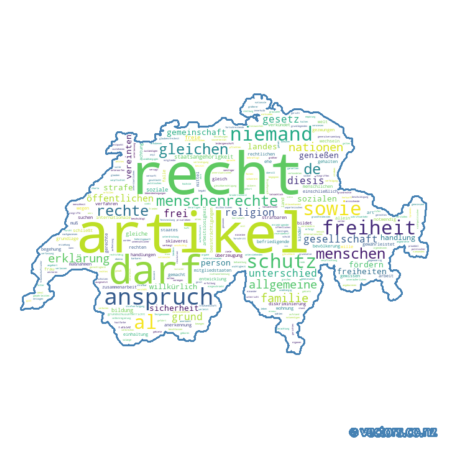

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from os import path
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

maske = np.array(Image.open(path.join(d, "maske.png")))

wc = WordCloud(background_color="white", max_words=2000, mask=maske, contour_width=3, contour_color='steelblue',collocations=False, normalize_plurals=False)
wc.generate(text)
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()